Missing Data:
 Order_ID             0
Product_Category    24
Product_Price       20
Customer_Age        15
Rating              25
Review_Text         21
Order_Date          10
dtype: int64
Duplicate Rows:
      Order_ID Product_Category  Product_Price  Customer_Age  Rating  \
3           4            Books         4568.0          35.0     3.0   
6           7       Home Decor          130.0          67.0     3.0   
7           8         Clothing         1905.0          41.0     1.0   
8           9            Books         3669.0          32.0     4.0   
9          10      Electronics         1536.0          47.0     4.0   
..        ...              ...            ...           ...     ...   
500        46       Home Decor         2965.0          41.0     4.0   
501       109       Home Decor          384.0          56.0     1.0   
502        52      Electronics         2434.0          26.0     3.0   
503       281       Home Decor         3093.0          24.0     3.0   
504       461

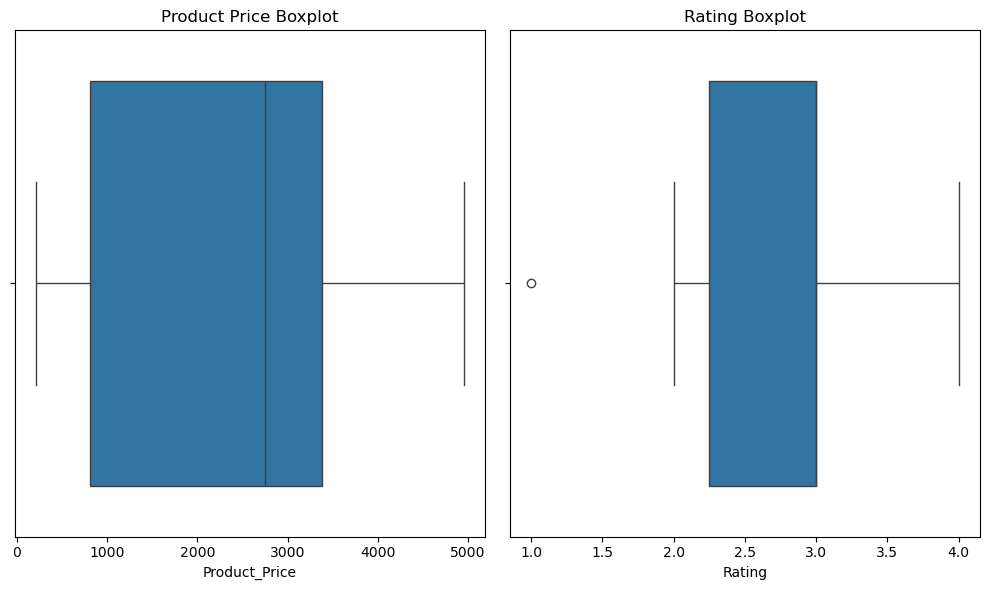

Data Cleaning Complete. Cleaned dataset saved as 'cleaned_E_Commerce_Data.csv'.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
df = pd.read_csv('Day 20_E-Commerce_Data.csv')

# Step 2: Handle Missing Values

# 2a. Identify missing values
missing_data = df.isnull().sum()
print("Missing Data:\n", missing_data)

# 2b. Impute missing numerical values
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())  # Impute missing Rating with the mean
df['Customer_Age'] = df['Customer_Age'].fillna(df['Customer_Age'].median())  # Impute missing Customer_Age with the median

# 2c. Impute missing textual data (Review_Text) with 'No Review'
df['Review_Text'] = df['Review_Text'].fillna('No Review')

# Step 3: Detect and Remove Duplicates
duplicates = df[df.duplicated(subset=['Review_Text'])]
print("Duplicate Rows:\n", duplicates)

# Remove duplicates based on Review_Text
df = df.drop_duplicates(subset=['Review_Text'])

# Step 4: Handle Inconsistent Data

# 4a. Standardize Rating values (ensure they are between 1 and 5)
df['Rating'] = df['Rating'].apply(lambda x: max(1, min(x, 5)))  # Cap Rating between 1 and 5

# 4b. Correct spelling inconsistencies in Product_Category (example standardization)
df['Product_Category'] = df['Product_Category'].str.lower()  # Convert to lowercase to standardize
df['Product_Category'] = df['Product_Category'].str.strip()  # Remove leading/trailing spaces

# Step 5: Identify and Handle Outliers

# 5a. Visualize outliers using boxplots
plt.figure(figsize=(10, 6))

# Boxplot for Product_Price
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Product_Price'])
plt.title('Product Price Boxplot')

# Boxplot for Rating
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Rating'])
plt.title('Rating Boxplot')

plt.tight_layout()
plt.show()

# 5b. Handle outliers (for example, removing outliers in Product_Price > 99 and Rating < 1 or > 5)
df = df[(df['Product_Price'] <= 99) & (df['Rating'] >= 1) & (df['Rating'] <= 5)]

# Step 6: Prepare Data for Analysis

# 6a. Convert categorical data into numerical format (e.g., using label encoding or one-hot encoding)
df['Product_Category'] = df['Product_Category'].astype('category').cat.codes  # Label encode Product_Category

# Step 7: Save the final cleaned dataset
df.to_csv('cleaned_E_Commerce_Data.csv', index=False)

print("Data Cleaning Complete. Cleaned dataset saved as 'cleaned_E_Commerce_Data.csv'.")